<a href="https://colab.research.google.com/github/shoabahamed/khanacademy-statistics-and-probability/blob/main/differentways_to_find_best_fitline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<p>Creating fake datas where x is Area of a building and y is The Price corrospoding to it</p>

In [18]:
datas = {'Area': [15, 20, 22, 23, 24, 25, 28, 30 , 35, 39, 40, 43, 45, 50],
            'Price': [200, 260, 354, 376, 335, 380, 459, 530, 600, 685, 700, 735, 800, 955]}

df = pd.DataFrame(datas)
df.head()

,Area,Price
0,15,200
1,20,260
2,22,354
3,23,376
4,24,335


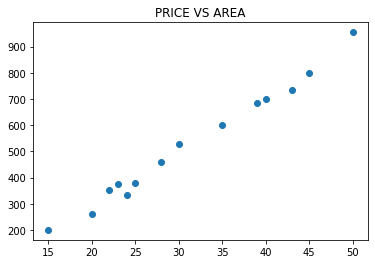

In [54]:
plt.scatter(df['Area'], df['Price'])
plt.title('PRICE VS AREA')
plt.show()

<P>Lets write a function to calculate the mean squared error first</p>

In [29]:
a = np.array([1, 2, 3])
if isinstance(a, np.ndarray):
    print('This is a numpy array')

This is a numpy array


In [58]:
def mean_squared_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    sqrt_error = np.square(y_true - y_pred)
    return np.mean(sqrt_error)

mean_squared_error([1, 2, 3], [3, 4, 5])

4.0

<P>Lets try to find the best fit line thought the equation derived 
</P>

In [46]:
def get_slope(x, y):

    x = np.array(x)
    y = np.array(y)

    x_square = np.square(x)
    xy = x*y

    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_square_mean = np.mean(x_square)
    xy_mean = np.mean(xy)

    nominator = (xy_mean/x_mean) - y_mean
    denominator = (x_square_mean/x_mean) - x_mean
    return nominator/denominator

def get_intercept(x, y):
    x = np.array(x)
    y = np.array(y)

    y_mean = np.mean(y)
    x_mean = np.mean(x)
    slope = get_slope(x, y)

    intercept = y_mean - (x_mean * slope)

    return intercept


In [47]:
x = df['Area'] 
y = df['Price']

slope = get_slope(x, y)
intercept = get_intercept(x, y)

print(f'The slope of the equation is {slope} and the intercept is {intercept}')

The slope of the equation is 20.936173299163507 and the intercept is -130.14143416662705


In [50]:
def predicted_y(x):
    y_pred = slope * x + intercept
    return y_pred
 

In [52]:
y_pred = predicted_y(x)

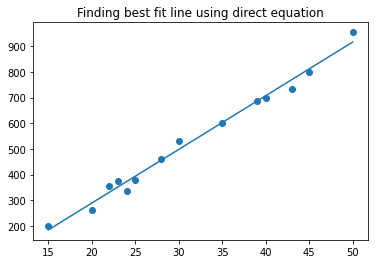

In [55]:
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.title('Finding best fit line using direct equation')
plt.show()

In [56]:
print(f'Total error in direct equation {mean_squared_error(y, y_pred)}')

Total error is 553.5497385453863


<h2>Now lets try finds the best fit line using gradient discent</h2>

In [77]:
def gradient_descent(x, y_true, learning_rate=0.01, threshold=600, epochs=30):
    x = np.array(x)
    y_true = np.array(y_true)

    x_squared_mean = np.mean(np.square(x))
    x_mean = np.mean(x)

    w = 0
    bias = 1

    for i in range(epochs):
        y_pred = w * x + bias
        error = mean_squared_error(y_true, y_pred)

        xy_pred_mean = np.mean(x * y_pred)
        y_pred_mean = np.mean(y_pred)
        
        w_d = -xy_pred_mean + w * x_squared_mean + bias * x_mean
        bias_d = -y_pred_mean + w * x_mean + bias

        print(bias_d)
        print(w_d)
        w = w - learning_rate * w_d
        bias = bias - learning_rate * bias_d

        print(f'The total mean square error is {error}')
        print(y_pred_mean, xy_pred_mean, x_mean, x_squared_mean)
        if error < threshold:
            break

    return w, bias

In [79]:
gradient_descent(x, y, learning_rate=0.1, epochs=2, threshold=600)

0.0
0.0
The total mean square error is 322803.5
1.0 31.357142857142858 31.357142857142858 1088.7857142857142


(0.0, 1.0)

In [136]:
def gradient_descent(x, y_true, learning_rate=0.001, threshold=600, epochs=30):
    x = np.array(x)
    y_true = np.array(y_true)


    w = 0
    bias = 1
    n = len(x)

    for index in range(epochs):
        y_pred = w * x + bias
        error = mean_squared_error(y_true, y_pred)

        w_d =   -(2/n) * sum(x * (y_true- y_pred))
        bias_d = -(2/n) * sum(y_true - y_pred)

        w = w -  learning_rate * w_d
        bias = bias - learning_rate * bias_d
        if index % 30 == 0:
            print(f'The total mean square error is {error} and slope {w}, bias {bias}')

        if error < threshold:
            break

    return w, bias

In [105]:
gradient_descent([1, 2, 3, 4, 5], [5, 7, 9, 11, 13], learning_rate=0.01, epochs=20, threshold=1)

The total mean square error is 72.0 and slope 0.56, bias 1.16
The total mean square error is 42.0928 and slope 0.9872000000000001, bias 1.2832
The total mean square error is 24.663454720000004 and slope 1.313024, bias 1.378304
The total mean square error is 14.505591574528001 and slope 1.56146048, bias 1.45195648
The total mean square error is 8.585194329633586 and slope 1.7508217856000001, bias 1.5092297216
The total mean square error is 5.134188487121925 and slope 1.8950872094720002, bias 1.5539958200319999
The total mean square error is 3.12222772007859 and slope 2.00492827418624, bias 1.5892106710630398
The total mean square error is 1.9488771576012642 and slope 2.088491413601485, bias 1.6171307611906047
The total mean square error is 1.2642330421288384 and slope 2.1519954569377218, bias 1.6394786611507035
The total mean square error is 0.8643887462595379 and slope 2.2001877367423806, bias 1.6575693605114261


(2.2001877367423806, 1.6575693605114261)

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaled_x = scaler_x.fit_transform(x.values.reshape(1, len(x)))
scaled_y = scaler_y.fit_transform(y.values.reshape(1, len(y)))
scaled_y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [128]:
scaler_y.inverse_transform(scaled_y)

array([[200., 260., 354., 376., 335., 380., 459., 530., 600., 685., 700.,
        735., 800., 955.]])

In [130]:
new_x = scaled_x.reshape(len(x), )
new_y = scaled_y.reshape(len(y), )

In [141]:
w, bias = gradient_descent(new_x, new_y, learning_rate=0.01, epochs=5000, threshold=0.001)

The total mean square error is 1.0 and slope 0.0, bias 0.98
The total mean square error is 0.29755314269212063 and slope 0.0, bias 0.5345746329947884
The total mean square error is 0.08853787272595756 and slope 0.0, bias 0.2916020798382783
The total mean square error is 0.026344722276883677 and slope 0.0, bias 0.15906436205108637
The total mean square error is 0.007838954906837862 and slope 0.0, bias 0.0867671152714384
The total mean square error is 0.002332505667951423 and slope 0.0, bias 0.047330100818618034


In [143]:
y_predicted = w * new_x + bias
y_pred_new = scaler_y.inverse_transform(y_predicted.reshape(1, len(y_predicted)))
y_pred_new

array([[200.03096599, 260.03096599, 354.03096599, 376.03096599,
        335.03096599, 380.03096599, 459.03096599, 530.03096599,
        600.03096599, 685.03096599, 700.03096599, 735.03096599,
        800.03096599, 955.03096599]])

In [148]:
y.tolist()

[200, 260, 354, 376, 335, 380, 459, 530, 600, 685, 700, 735, 800, 955]

In [153]:
print([round(value) for value in y_pred.tolist()])

[184, 289, 330, 351, 372, 393, 456, 498, 603, 686, 707, 770, 812, 917]


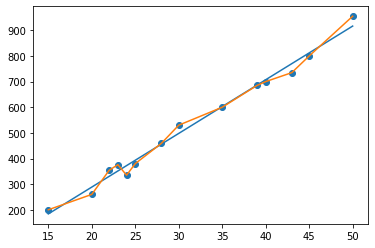

In [156]:
plt.scatter(x, y)
plt.plot(x, y_pred, label='From equation')
plt.plot(x, y_pred_new.flatten(), label='From gradient disecent')
plt.show()

In [145]:
print(f'The mean square error is {mean_squared_error(y, y_pred_new)}')

The mean square error is 0.000958892757051743
